In [1]:
import pandas as pd

crime = pd.read_csv('Crimes_-_2001_to_present.csv')
demo = pd.read_csv("master.csv") # https://www.kaggle.com/datasets/robertyu02/cpd-police-beat-demographics?select=master.csv

demo.columns

/tmp/ipykernel_613041/1472119340.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('Crimes_-_2001_to_present.csv')


Index(['beat', 'population', 'square_mileage', 'households', '85+', '80-84',
       '75-79', '70-74', '67-69', '65-66', '62-64', '60-61', '55-59', '50-54',
       '45-49', '40-44', '35-39', '30-34', '25-29', '22-24', '21', '20',
       '18-19', '15-17', '10-14', '5-9', '0-4', '<=21', '22-29', '30-39',
       '40-49', '50-59', '60-64', '65+', 'num_white', 'num_hispanic',
       'num_black', 'num_asian', 'num_mixed', 'num_other', 'percent_white',
       'percent_hispanic', 'percent_black', 'percent_asian', 'percent_mixed',
       'percent_other', 'med_income', 'pop_food_stamps', 'percent_on_fs',
       'bachelors', 'high_school', 'no_high_school', 'percent_bachelors',
       'percent_high_school', 'percent_no_high_school', 'se_35+', 'se_25-34',
       'se_20-24', 'se_18-19', 'se_15-17', 'se_10-14', 'se_5-9', 'se_0-4',
       'total_se', 'percent_se', 'percent_se_0-4', 'percent_se_5-9',
       'percent_se_10-14', 'percent_se_15-17', 'percent_se_18-19',
       'percent_se_20-24', 'percent_

In [2]:
demo['beat'] = pd.to_numeric(demo['beat'])
crime['Beat'] = pd.to_numeric(crime['Beat'])
new = pd.merge(crime, demo, left_on="Beat", right_on="beat", how='left')

In [3]:
new.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'beat', 'population', 'square_mileage', 'households', '85+',
       '80-84', '75-79', '70-74', '67-69', '65-66', '62-64', '60-61', '55-59',
       '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '22-24', '21',
       '20', '18-19', '15-17', '10-14', '5-9', '0-4', '<=21', '22-29', '30-39',
       '40-49', '50-59', '60-64', '65+', 'num_white', 'num_hispanic',
       'num_black', 'num_asian', 'num_mixed', 'num_other', 'percent_white',
       'percent_hispanic', 'percent_black', 'percent_asian', 'percent_mixed',
       'percent_other', 'med_income', 'pop_food_stamps', 'percent_on_fs',
       'bachelors', 'high_school', 'no_high_school', 'percent_bachelors',
       'percent_high_scho

## Data

This was the prompt to capture attributes:

These are the columns to my pandas dataframe. 
```
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'beat', 'population', 'square_mileage', 'households', '85+',
       '80-84', '75-79', '70-74', '67-69', '65-66', '62-64', '60-61', '55-59',
       '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '22-24', '21',
       '20', '18-19', '15-17', '10-14', '5-9', '0-4', '<=21', '22-29', '30-39',
       '40-49', '50-59', '60-64', '65+', 'num_white', 'num_hispanic',
       'num_black', 'num_asian', 'num_mixed', 'num_other', 'percent_white',
       'percent_hispanic', 'percent_black', 'percent_asian', 'percent_mixed',
       'percent_other', 'med_income', 'pop_food_stamps', 'percent_on_fs',
       'bachelors', 'high_school', 'no_high_school', 'percent_bachelors',
       'percent_high_school', 'percent_no_high_school', 'se_35+', 'se_25-34',
       'se_20-24', 'se_18-19', 'se_15-17', 'se_10-14', 'se_5-9', 'se_0-4',
       'total_se', 'percent_se', 'percent_se_0-4', 'percent_se_5-9',
       'percent_se_10-14', 'percent_se_15-17', 'percent_se_18-19',
       'percent_se_20-24', 'percent_se_25-34', 'youngPop', 'percent_se_35+'],
      dtype='object')
```
What are the protected attributes in terms of bias and fairness? Are there any features that could be used as proxies for protected attributes? If so, please identify and remove them.

The output was
```
protected_cols = ['num_white', 'num_hispanic', 'num_black', 'num_asian', 'num_mixed', 'num_other', 
                  'percent_white', 'percent_hispanic', 'percent_black', 'percent_asian', 'percent_mixed', 'percent_other',
                  'Location', 'Community Area',
                  'med_income', 'pop_food_stamps', 'percent_on_fs',
                  '85+', '80-84', '75-79', '70-74', '67-69', '65-66', '62-64', '60-61', '55-59',
                  '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '22-24', '21',
                  '20', '18-19', '15-17', '10-14', '5-9', '0-4', 'percent_se_35+', 'youngPop']
```
In this case, chatGPT captured most of the protected attributes. However, it fails to capture some of the age groups as well as many of the protected attributes that have percentages in them, such as percent_se_5-9. These attributes have age related information in them and should be considered protected attributes. Thus, the final protected list should be

```
protected_cols = ['num_white', 'num_hispanic', 'num_black', 'num_asian', 'num_mixed', 'num_other', 
                  'percent_white', 'percent_hispanic', 'percent_black', 'percent_asian', 'percent_mixed', 'percent_other',
                  'Location', 'Community Area',
                  'med_income', 'pop_food_stamps', 'percent_on_fs',
                  '85+',
                  '80-84', '75-79', '70-74', '67-69', '65-66', '62-64', '60-61', '55-59',
                  '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '22-24', '21',
                  '20', '18-19', '15-17', '10-14', '5-9', '0-4', '<=21', '22-29', '30-39',
                  '40-49', '50-59', '60-64', '65+',
                  'se_25-34', 'se_20-24', 'se_18-19', 'se_15-17', 'se_10-14', 'se_5-9', 'se_0-4',
                  'total_se', 'percent_se', 'percent_se_0-4', 'percent_se_5-9',
                  'percent_se_10-14', 'percent_se_15-17', 'percent_se_18-19',
                  'percent_se_20-24', 'percent_se_25-34', 'youngPop', 'percent_se_35+']
```

In [4]:
protected_cols = ['num_white', 'num_hispanic', 'num_black', 'num_asian', 'num_mixed', 'num_other', 
                  'percent_white', 'percent_hispanic', 'percent_black', 'percent_asian', 'percent_mixed', 'percent_other',
                  'Location', 'Community Area',
                  'med_income', 'pop_food_stamps', 'percent_on_fs',
                  '85+',
                  '80-84', '75-79', '70-74', '67-69', '65-66', '62-64', '60-61', '55-59',
                  '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '22-24', '21',
                  '20', '18-19', '15-17', '10-14', '5-9', '0-4', '<=21', '22-29', '30-39',
                  '40-49', '50-59', '60-64', '65+',
                  'se_25-34', 'se_20-24', 'se_18-19', 'se_15-17', 'se_10-14', 'se_5-9', 'se_0-4',
                  'total_se', 'percent_se', 'percent_se_0-4', 'percent_se_5-9',
                  'percent_se_10-14', 'percent_se_15-17', 'percent_se_18-19',
                  'percent_se_20-24', 'percent_se_25-34', 'youngPop', 'percent_se_35+', 'se_35+']
protected_cols_2 = ['num_white', 'num_hispanic', 'num_black', 'num_asian', 'num_mixed', 'num_other', 
                  'percent_white', 'percent_hispanic', 'percent_black', 'percent_asian', 'percent_mixed', 'percent_other',
                  'med_income', 'pop_food_stamps', 'percent_on_fs',
                  '85+',
                  '80-84', '75-79', '70-74', '67-69', '65-66', '62-64', '60-61', '55-59',
                  '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '22-24', '21',
                  '20', '18-19', '15-17', '10-14', '5-9', '0-4', '<=21', '22-29', '30-39',
                  '40-49', '50-59', '60-64', '65+',
                  'se_25-34', 'se_20-24', 'se_18-19', 'se_15-17', 'se_10-14', 'se_5-9', 'se_0-4',
                  'total_se', 'percent_se', 'percent_se_0-4', 'percent_se_5-9',
                  'percent_se_10-14', 'percent_se_15-17', 'percent_se_18-19',
                  'percent_se_20-24', 'percent_se_25-34', 'youngPop', 'percent_se_35+', 'se_35+']
fair = new.drop(protected_cols, axis = 1)
demo = demo.drop(protected_cols_2, axis = 1)

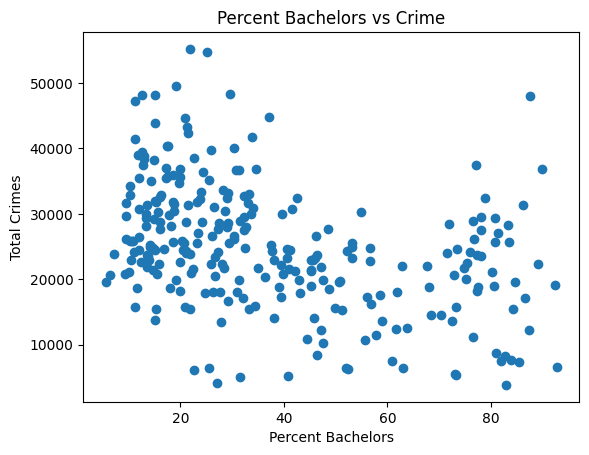

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'num_crime' is a column that indicates the number of crimes in the area
# Calculate total crimes for each education level 
beat_crime = fair.groupby('beat')['beat'].size().to_frame(name = 'counts').reset_index()
test = pd.merge(demo, beat_crime, left_on="beat", right_on="beat", how='right')

plt.scatter(test.percent_bachelors, test.counts)
plt.title('Percent Bachelors vs Crime')
plt.xlabel('Percent Bachelors')
plt.ylabel('Total Crimes')
plt.show()

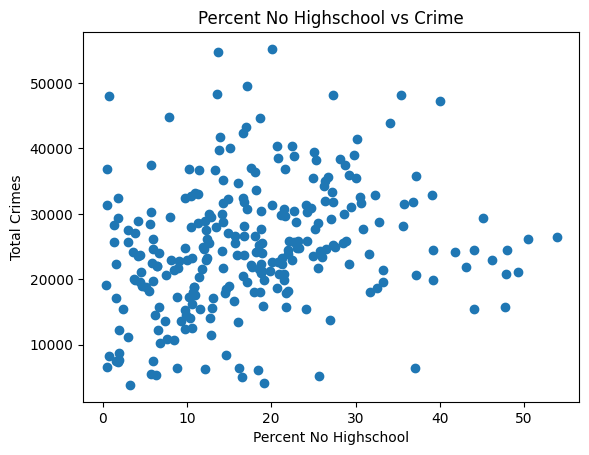

In [6]:
plt.scatter(test.percent_no_high_school, test.counts)
plt.title('Percent No Highschool vs Crime')
plt.xlabel('Percent No Highschool')
plt.ylabel('Total Crimes')
plt.show()

There could be bias that arises in the data when we consider the education of the beats. Usually, poorer beats and beats with primarily black population have lower percentage of people who hold bachelor degrees, and a higher percentage of people who do not have high school degrees. However, it is interesting to note that in the first plot, when the percentage of bachelor degree holders got passed 60%, the number of crimes increased. This could be a factor not related to education, but to the demographic itself. People with bachelor degrees tend to have higher paying jobs and are thus targeted by crime.

In the modeling, the level of education could be a proxy for income, since households with higher income tend to be able to support children through college, while lower income communities struggle in that sense.

In [13]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.functions import explode, posexplode, lit
from pyspark.sql.functions import expr, date_add
from pyspark.sql.functions import lag
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
spark = SparkSession.builder.getOrCreate()

df = spark.read.options(header = 'True', inferSchema='True').csv('Crimes_-_2001_to_present.csv')

# Define the UCR codes that represent violent crimes
violent_crime_codes = ["0110", "0130", "0261", "0262", "0263", "0264", "0265", "0266", "0281", "0291", "1753", "1754"]

# Filter out only the violent crimes
violent_crimes_df = df.filter(df.IUCR.isin(violent_crime_codes))

# Change the Date to a DateType
violent_crimes_df = violent_crimes_df.withColumn("Date", F.to_date(F.col("Date"), 'MM/dd/yyyy hh:mm:ss a'))
violent_crimes_df = violent_crimes_df.withColumn("week_of_yr", F.weekofyear(violent_crimes_df.Date))
violent_crimes_df = violent_crimes_df.withColumn("yr", F.year(violent_crimes_df.Date))

# Aggregate on a weekly basis
weekly_violent_crimes_df = violent_crimes_df.groupBy('week_of_yr', 'yr', "Beat").count()

df = df.withColumn("Date", F.to_date(F.col("Date"), 'MM/dd/yyyy hh:mm:ss a'))

# Get the min and max date from the original DataFrame
min_date, max_date = df.select(F.min("Date"), F.max("Date")).first()

# Generate the range of dates with 1-week increments
date_range = spark.range(0, (max_date - min_date).days // 7).select(date_add(lit(min_date), (7 * F.col("id")).cast('integer')).alias("week"))

# Get all the unique beats
beats = df.select("Beat").distinct()

# Create a DataFrame with all combinations of Date and Beat
complete_df = beats.crossJoin(date_range)

# Show the DataFrame
complete_df = complete_df.withColumn("week_of_yr", F.weekofyear("week"))
complete_df = complete_df.withColumn("yr", F.year("week"))
complete_df = complete_df.drop('week')

filled_df = complete_df.join(weekly_violent_crimes_df, ["week_of_yr", "yr", "Beat"], "left_outer")

# Fill the null counts with 0
filled_df = filled_df.na.fill({"count": 0})
filled_df = filled_df.orderBy(['Beat', 'yr', "week_of_yr"])

# Window
window = Window.partitionBy("Beat").orderBy("yr", "week_of_yr")

# Creating lagged feature for 1 week
filled_df = filled_df.withColumn("lag_week_1", lag(filled_df["count"]).over(window))
# Creating lagged feature for 1 month (approx. 4 weeks)
filled_df = filled_df.withColumn("lag_month_1", lag(filled_df["count"], 4).over(window)).na.drop()

indexer = StringIndexer(inputCol="Beat", outputCol="beat_idx")
indexer_model = indexer.fit(filled_df)
indexed = indexer_model.transform(filled_df)
indexed = indexed.withColumn("beat_idx", indexed.beat_idx.cast("int"))
indexed = indexed.withColumn("Beat", indexed.Beat.cast("string"))


df_spark = spark.createDataFrame(test)
df_spark = df_spark.withColumn("beat_idx", df_spark.beat.cast("string"))
final_df = indexed.join(df_spark.withColumnRenamed('beat', "Beat"), 'Beat', 'left_outer').toPandas()

In [14]:
final_df

,Beat,week_of_yr,yr,count,lag_week_1,lag_month_1,beat_idx,population,square_mileage,households,bachelors,high_school,no_high_school,percent_bachelors,percent_high_school,percent_no_high_school,counts,beat_idx
0,111,4,2001,0,0,0,12,1982.585454,0.106797,987.838731,1146.140053,247.578431,25.907695,80.735830,17.439797,1.824977,29312.0,111
1,111,5,2001,0,0,0,12,1982.585454,0.106797,987.838731,1146.140053,247.578431,25.907695,80.735830,17.439797,1.824977,29312.0,111
2,111,6,2001,0,0,0,12,1982.585454,0.106797,987.838731,1146.140053,247.578431,25.907695,80.735830,17.439797,1.824977,29312.0,111
3,111,7,2001,0,0,0,12,1982.585454,0.106797,987.838731,1146.140053,247.578431,25.907695,80.735830,17.439797,1.824977,29312.0,111
4,111,8,2001,0,0,0,12,1982.585454,0.106797,987.838731,1146.140053,247.578431,25.907695,80.735830,17.439797,1.824977,29312.0,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304907,2534,12,2020,0,0,0,210,11257.244306,0.503779,3256.249983,1127.668252,2906.121842,2389.111295,17.557016,45.246309,37.196812,35726.0,2534
304908,2534,13,2020,0,0,1,210,11257.244306,0.503779,3256.249983,1127.668252,2906.121842,2389.111295,17.557016,45.246309,37.196812,35726.0,2534
304909,2534,14,2020,0,0,0,210,11257.244306,0.503779,3256.249983,1127.668252,2906.121842,2389.111295,17.557016,45.246309,37.196812,35726.0,2534
304910,2534,15,2020,0,0,0,210,11257.244306,0.503779,3256.249983,1127.668252,2906.121842,2389.111295,17.557016,45.246309,37.196812,35726.0,2534


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

final_df = final_df.dropna()

# Split the data into features and target
X = final_df.drop(['count', 'counts'], axis=1)
y = final_df['count']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("Mean Absolute Error of the Random Forest model: ", mae)
print(mse)

Mean Absolute Error of the Random Forest model:  0.2699135925556663
0.1864226874930763


In [16]:
from sklearn.metrics import mean_absolute_error

# Predict 'count' using your model
final_df = final_df.drop('counts', axis = 1)
final_df['predicted_count'] = model.predict(final_df.drop(['count'], axis=1))

# Split final_df into two groups
df_high_bachelors = final_df[final_df['percent_bachelors'] > 60]
df_low_bachelors = final_df[final_df['percent_bachelors'] <= 60]

# Calculate MAE for each group
mae_high_bachelors = mean_absolute_error(df_high_bachelors['count'], df_high_bachelors['predicted_count'])
mae_low_bachelors = mean_absolute_error(df_low_bachelors['count'], df_low_bachelors['predicted_count'])

print("MAE for high percentage of bachelor degrees: ", mae_high_bachelors)
print("MAE for low percentage of bachelor degrees: ", mae_low_bachelors)


MAE for high percentage of bachelor degrees:  0.07839855433698903
MAE for low percentage of bachelor degrees:  0.14833438935529858


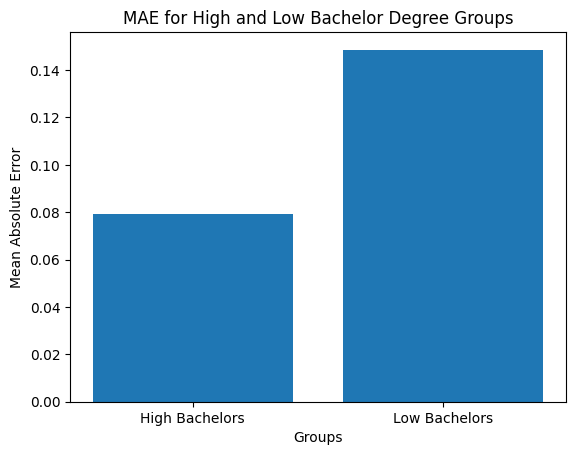

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Groups
groups = ['High Bachelors', 'Low Bachelors']

# MAEs
maes = [mae_high_bachelors, mae_low_bachelors]

# Create bars
plt.bar(groups, maes)

# Create names on the x-axis
plt.xlabel('Groups')
plt.ylabel('Mean Absolute Error')

# Title
plt.title('MAE for High and Low Bachelor Degree Groups')

# Show graphic
plt.show()


As seen above, the model for the crime prediction of beats with low percentage of bachelor degrees is 50% higher than that of beats with high percentage of bachelor degrees. This shows that there is still bias in the model and analysis, as the model is less accuracte for a certain group.

The reason education level, especially bachelors degree, was a good group to use for the fairness metrics is because education level can also be a big indicator in the disparities in different beats. Education level can be a significant predictor of various socioeconomic outcomes, including income, occupation, health, and crime rates. Therefore, it's a relevant attribute to consider when assessing fairness. Education can also intersect with other demographic attributes like race and age. For example, marginalized groups often have less access to quality education. By considering education, we may be able to detect more complex forms of bias. Education levels can vary greatly across different areas or "beats" due to factors like the quality of local schools and access to higher education. If a model performs differently for beats with different average education levels, it could suggest a geographical bias. If we find that our model is biased in relation to education, it could inform policy interventions, such as crime prevention programs targeted at areas with lower education levels.

To mitigate such bias, we could use various strategies. We could lter the output of the learning algorithm to make it fair. This might involve changing the decision threshold for different groups. In this case, we could change the threshold from 60% to, say, 40%. Then, if a beat has 40% or higher bachelor degrees, it would be considered as a high percentage of bachelor degrees. Moreoevr, we can attempt to make the input data fair before it is fed into the learning algorithm. This might involve reweighing the training instances such that different groups have different weights or changing the labels in the training instances. For instance, we can increase the weight on crimes that happen in beats with high percentage of bachelor degrees, since they are less common in those areas.